<a href="https://github.com/glebsamarec">Самарец Глєб</a>, 2024

#### <h1 align="center">Лабораторна робота №4. Імовірнісний підхід до машинного навчання. Байєсівська класифікатор
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
   <b> <li>Реалізувати наївний байєсівський класифікатор для свого варіанта.</li>

</ol>

In [7]:
import numpy as np

x_train_2 = np.array([[39, 49], [26, 34], [30, 12], [11, 11], [17, 8], [22, 7], [46, 47], [23, 46], [40, 47], [37, 34]])
y_train_2 = np.array([1, 1, -1, -1, -1, 1, 1, 1, -1, -1])

mw1_2, ml1_2 = np.mean(x_train_2[y_train_2 == 1], axis=0)
mw_1_2, ml_1_2 = np.mean(x_train_2[y_train_2 == -1], axis=0)

sw1_2, sl1_2 = np.var(x_train_2[y_train_2 == 1], axis=0)
sw_1_2, sl_1_2 = np.var(x_train_2[y_train_2 == -1], axis=0)

print('Середнє: ', mw1_2, ml1_2, mw_1_2, ml_1_2)
print('Дисперсії:', sw1_2, sl1_2, sw_1_2, sl_1_2)

x_2 = [40, 10]  # довжина, ширина жука

a_1_2 = lambda x: -(x[0] - ml_1_2) ** 2 / (2 * sl_1_2) - (x[1] - mw_1_2) ** 2 / (2 * sw_1_2)  # Перший класифікатор
a1_2 = lambda x: -(x[0] - ml1_2) ** 2 / (2 * sl1_2) - (x[1] - mw1_2) ** 2 / (2 * sw1_2)  # Другий класифікатор
y_2 = np.argmax([a_1_2(x_2), a1_2(x_2)])  # Обираємо максимум

print('Номер класу (0 - гусениця, 1 - божа корівка): ', y_2)


Середнє:  31.2 36.6 27.0 22.4
Дисперсії: 91.76 246.64000000000001 126.8 237.03999999999996
Номер класу (0 - гусениця, 1 - божа корівка):  0


<ol>
   <b> 2.Реалізувати байєсівський класифікатор, попередньо змоделювавши дані згідно параметри кластерів у відповідності до свого варіанта.
</ol>

0


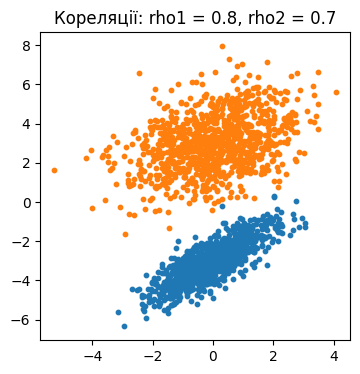

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Вхідні параметри для першого кластеру
rho1 = 0.8
sigma_x1_squared = 1.0
mu_x1 = [0, -3]
sigma_y1_squared = 1.0
mu_y1 = [0, -3]

# Вхідні параметри для другого кластеру (за замовчуванням)
rho2 = 0.7
sigma_x2_squared = 2.0
mu_x2 = [0, 3]
sigma_y2_squared = 2.0
mu_y2 = [0, 3]

# моделювання навчальної вибірки для кожного кластеру
N = 1000
x1 = np.random.multivariate_normal(mu_x1, [[sigma_x1_squared, rho1], [rho1, sigma_y1_squared]], N).T
x2 = np.random.multivariate_normal(mu_x2, [[sigma_x2_squared, rho2], [rho2, sigma_y2_squared]], N).T

# обчислення оцінок середнього та коваріаційних матриць для кожного кластеру
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 0.5, 1  # ймовірності появи класів
Py2, L2 = 1 - Py1, 1  # та величини штрафів невірної класифікації

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # класифікатор
print(a)

# виведення графіків
plt.figure(figsize=(4, 4))
plt.title(f"Кореляції: rho1 = {rho1}, rho2 = {rho2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()


<ol>
    <b>2.1.Змінити знак коефіцієнта кореляції одного з кластерів. Повторити експеримент з класифікації. .
</ol>

Було змінено rho2 на протилежне число і корелація кластерів rho2 змінилась зеркально.

0


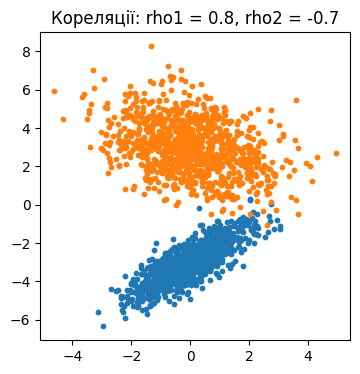

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Вхідні параметри для першого кластеру
rho1 = 0.8
sigma_x1_squared = 1.0
mu_x1 = [0, -3]
sigma_y1_squared = 1.0
mu_y1 = [0, -3]

# Вхідні параметри для другого кластеру (за замовчуванням)
rho2 = -0.7
sigma_x2_squared = 2.0
mu_x2 = [0, 3]
sigma_y2_squared = 2.0
mu_y2 = [0, 3]

# моделювання навчальної вибірки для кожного кластеру
N = 1000
x1 = np.random.multivariate_normal(mu_x1, [[sigma_x1_squared, rho1], [rho1, sigma_y1_squared]], N).T
x2 = np.random.multivariate_normal(mu_x2, [[sigma_x2_squared, rho2], [rho2, sigma_y2_squared]], N).T

# обчислення оцінок середнього та коваріаційних матриць для кожного кластеру
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 0.5, 1  # ймовірності появи класів
Py2, L2 = 1 - Py1, 1  # та величини штрафів невірної класифікації

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # класифікатор
print(a)

# виведення графіків
plt.figure(figsize=(4, 4))
plt.title(f"Кореляції: rho1 = {rho1}, rho2 = {rho2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()


<ol>
    <b>2.2.Модифікувати код на випадок трьох кластерів. Змоделювати відповідні дані і візуалізувати результати. ПРодемонструвати працездатність класифікатора.. 
</ol>

0


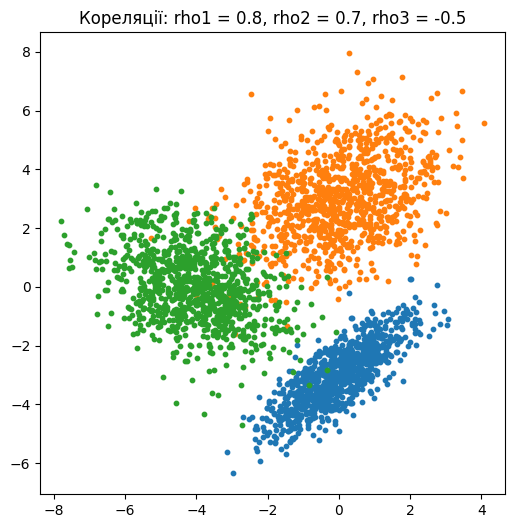

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Вхідні параметри для першого кластеру
rho1 = 0.8
sigma_x1_squared = 1.0
mu_x1 = [0, -3]
sigma_y1_squared = 1.0
mu_y1 = [0, -3]

# Вхідні параметри для другого кластеру
rho2 = 0.7
sigma_x2_squared = 2.0
mu_x2 = [0, 3]
sigma_y2_squared = 2.0
mu_y2 = [0, 3]

# Вхідні параметри для третього кластеру
rho3 = -0.5
sigma_x3_squared = 1.5
mu_x3 = [-4, 0]
sigma_y3_squared = 1.5
mu_y3 = [-4, 0]

# моделювання навчальної вибірки для кожного кластеру
N = 1000
x1 = np.random.multivariate_normal(mu_x1, [[sigma_x1_squared, rho1], [rho1, sigma_y1_squared]], N).T
x2 = np.random.multivariate_normal(mu_x2, [[sigma_x2_squared, rho2], [rho2, sigma_y2_squared]], N).T
x3 = np.random.multivariate_normal(mu_x3, [[sigma_x3_squared, rho3], [rho3, sigma_y3_squared]], N).T

# обчислення оцінок середнього та коваріаційних матриць для кожного кластеру
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x3.T - mm3).T
VV3 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 1/3, 1  # ймовірності появи класів
Py2, L2 = 1/3, 1  # та величини штрафів невірної класифікації
Py3, L3 = 1/3, 1  # (за замовчуванням)

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2), b(x, VV3, mm3, L3, Py3)])  # класифікатор
print(a)

# виведення графіків
plt.figure(figsize=(6, 6))
plt.title(f"Кореляції: rho1 = {rho1}, rho2 = {rho2}, rho3 = {rho3}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.scatter(x3[0], x3[1], s=10)
plt.show()


<h1 align="center">Контрольні запитання</h1>

1.Яка суть проблеми ймовірнісного погляду на машинне навчання в контексті логістичної регресії?
<br><br>
   <b>
 Проблема ймовірнісного погляду на машинне навчання в контексті логістичної регресії полягає в тому, що ми намагаємося прогнозувати ймовірність того, що певний випадок належить до певного класу. Логістична регресія використовує логістичну функцію (також відому як сигмоїду) для визначення ймовірності, що дозволяє нам вирішувати задачі класифікації.
</b>
<br><br>
2.Як працює метод максимальної правдоподібності в логістичній регресії?
  <br><br>
   <b>
   Метод максимальної правдоподібності в логістичній регресії використовується для оцінки параметрів моделі. Цей метод полягає в максимізації ймовірності спостережених даних, враховуючи параметри моделі. У логістичній регресії ми максимізуємо логарифмічну функцію правдоподібності.
  </b>
   <br><br>
3.Чим відрізняється багатокласова логістична регресія від бінарної?
<br><br>
<b> 
Багатокласова логістична регресія відрізняється від бінарної тим, що вона призначена для ситуацій, де потрібно класифікувати дані на більш ніж два класи. У бінарній логістичній регресії ми маємо два класи (позитивний і негативний), тоді як у багатокласовій є більше двох класів.
</b>
<br><br>
4.Що таке L2-регуляризатор і в чому сенс його використання для регуляризації моделей?
<br><br>
   <b>
 L2-регуляризатор (також відомий як регуляризація Ridge) є методом регуляризації, який додає квадратичну штрафну функцію на коефіцієнти моделі до функції втрат. Це допомагає уникнути перенавчання та забезпечити кращу генералізацію моделі.
  </b>
   <br><br>
5.Що таке L1-регуляризатор і в чому його принципова відмінність від L2-регуляризатора?
  <br><br>
<b>
L1-регуляризатор (або регуляризація Lasso) також додає штрафну функцію до функції втрат, але використовує абсолютне значення коефіцієнтів, а не їх квадратичні значення. Це може призвести до розріджених моделей, де деякі коефіцієнти будуть точно рівні нулю, що робить їх відмінними від L2-регуляризатора.
</b>
 <br><br>
6.В яких випадках доцільно використовувати лінійний дискримінант Фішера?есії?
  <br><br>
<b>
Лінійний дискримінант Фішера використовується в задачах класифікації, особливо коли класи мають нормальний розподіл із рівними коваріаційними матрицями. Він шукає лінійну комбінацію змінних, яка найкраще розділяє класи. Він особливо ефективний у випадках, коли кількість зразків у кожному класі значно перевищує кількість змінних.
</b>